In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [36]:
def min_max_scaler(data):
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    # noise term prevents the zero division
    return numerator / (denominator + 1e-7)

In [37]:
abalone_data = pd.read_csv('data/abalone.csv', names = ['Sex','Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight','Rings'])
abalone_data.head(10)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
5,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8
6,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,20
7,F,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.260,16
8,M,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.165,9
9,F,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.320,19


In [38]:
# min-max 정규화
abalone_data['Rings'] = min_max_scaler(abalone_data['Rings'])
print(abalone_data)

     Sex  Length  Diameter  Height  Whole weight  Shucked weight  \
0      M   0.455     0.365   0.095        0.5140          0.2245   
1      M   0.350     0.265   0.090        0.2255          0.0995   
2      F   0.530     0.420   0.135        0.6770          0.2565   
3      M   0.440     0.365   0.125        0.5160          0.2155   
4      I   0.330     0.255   0.080        0.2050          0.0895   
5      I   0.425     0.300   0.095        0.3515          0.1410   
6      F   0.530     0.415   0.150        0.7775          0.2370   
7      F   0.545     0.425   0.125        0.7680          0.2940   
8      M   0.475     0.370   0.125        0.5095          0.2165   
9      F   0.550     0.440   0.150        0.8945          0.3145   
10     F   0.525     0.380   0.140        0.6065          0.1940   
11     M   0.430     0.350   0.110        0.4060          0.1675   
12     M   0.490     0.380   0.135        0.5415          0.2175   
13     F   0.535     0.405   0.145        0.6845

In [39]:
data = np.array(abalone_data)
print(data[0:5,:])
print(data.shape)

[['M' 0.455 0.365 0.095 0.514 0.2245 0.10099999999999999 0.15
  0.4999999982142857]
 ['M' 0.35 0.265 0.09 0.2255 0.0995 0.0485 0.07 0.21428571352040815]
 ['F' 0.53 0.42 0.135 0.677 0.2565 0.1415 0.21 0.28571428469387755]
 ['M' 0.44 0.365 0.125 0.516 0.2155 0.114 0.155 0.3214285702806122]
 ['I' 0.33 0.255 0.08 0.205 0.0895 0.0395 0.055 0.21428571352040815]]
(4177, 9)


In [40]:
nvar = data.shape[1]
datax = data[:,1:nvar]
datay = data[:,0]
print(datax[0:5,:])
print(datay[0:5])

[[0.455 0.365 0.095 0.514 0.2245 0.10099999999999999 0.15
  0.4999999982142857]
 [0.35 0.265 0.09 0.2255 0.0995 0.0485 0.07 0.21428571352040815]
 [0.53 0.42 0.135 0.677 0.2565 0.1415 0.21 0.28571428469387755]
 [0.44 0.365 0.125 0.516 0.2155 0.114 0.155 0.3214285702806122]
 [0.33 0.255 0.08 0.205 0.0895 0.0395 0.055 0.21428571352040815]]
['M' 'M' 'F' 'M' 'I']


In [41]:
from sklearn.model_selection import train_test_split
trnx, tstx, trny, tsty = train_test_split(datax, datay, test_size=0.3, random_state=510)

In [42]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(trnx)
trnx_scale = scaler.transform(trnx)
tstx_scale = scaler.transform(tstx)
print(np.mean(trnx_scale[:,0]), np.std(trnx_scale[:,0]))
print(np.mean(tstx_scale[:,0]), np.std(tstx_scale[:,0]))

-2.4527458788297677e-15 1.0000000000000062
0.03827991542768724 0.9992748731009697


/home/yoon/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/yoon/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/yoon/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [43]:
from sklearn.neural_network import MLPClassifier
nn_model = MLPClassifier(activation='relu', solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5), random_state=1)
nn_model.fit(X=trnx_scale, y=trny)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=5, learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=1, shuffle=True, solver='lbfgs', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [44]:
nn_pred = nn_model.predict(X=tstx_scale)
print(nn_pred)

['M' 'M' 'I' ... 'I' 'I' 'I']


In [45]:
from sklearn.metrics import accuracy_score
accuracy_score(tsty, nn_pred)

0.5773524720893142

In [46]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(tsty)
y = le.transform(tsty) 

le = LabelEncoder()
le.fit(nn_pred)
y2 = le.transform(nn_pred) 

[1627]


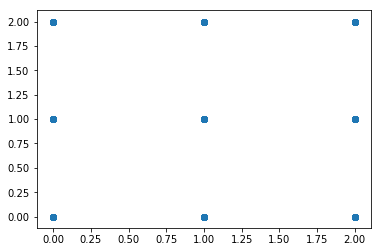

In [47]:
plt.scatter(x=y, y=y2)
print(np.correlate(y, y2))

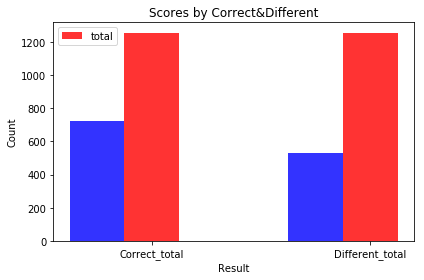

In [48]:
# data to plot
n_groups = 2

correct = (len(nn_pred[nn_pred == tsty]), len(nn_pred[nn_pred != tsty]))
total = (len(nn_pred), len(nn_pred))

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.25
opacity = 0.8

rects1 = plt.bar(index, correct, bar_width,
alpha=opacity,
color='b')

rects2 = plt.bar(index + bar_width, total, bar_width,
alpha=opacity,
color='r',
label='total')

plt.xlabel('Result')
plt.ylabel('Count')
plt.title('Scores by Correct&Different')
plt.xticks(index + bar_width, ('Correct_total', 'Different_total'))
plt.legend()

plt.tight_layout()
plt.show()